In [1]:
!pip install pycocotools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import pandas as pd 
import os
from pycocotools.coco import COCO
import skimage.io as io
import matplotlib.pyplot as plt
from pathlib import Path

In [23]:
dataDir=Path('../content/train')
annFile = Path('../content/train/_annotations.coco.json')
coco = COCO(annFile)
imgIds = coco.getImgIds()
cats = coco.loadCats(coco.getCatIds())
categories = [cat['name'] for cat in cats]
print(f"Количество категорий: {len(categories)}")
print()
print("Категории:")
print(categories)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Количество категорий: 4

Категории:
['furniture', 'chair', 'sofa', 'table']


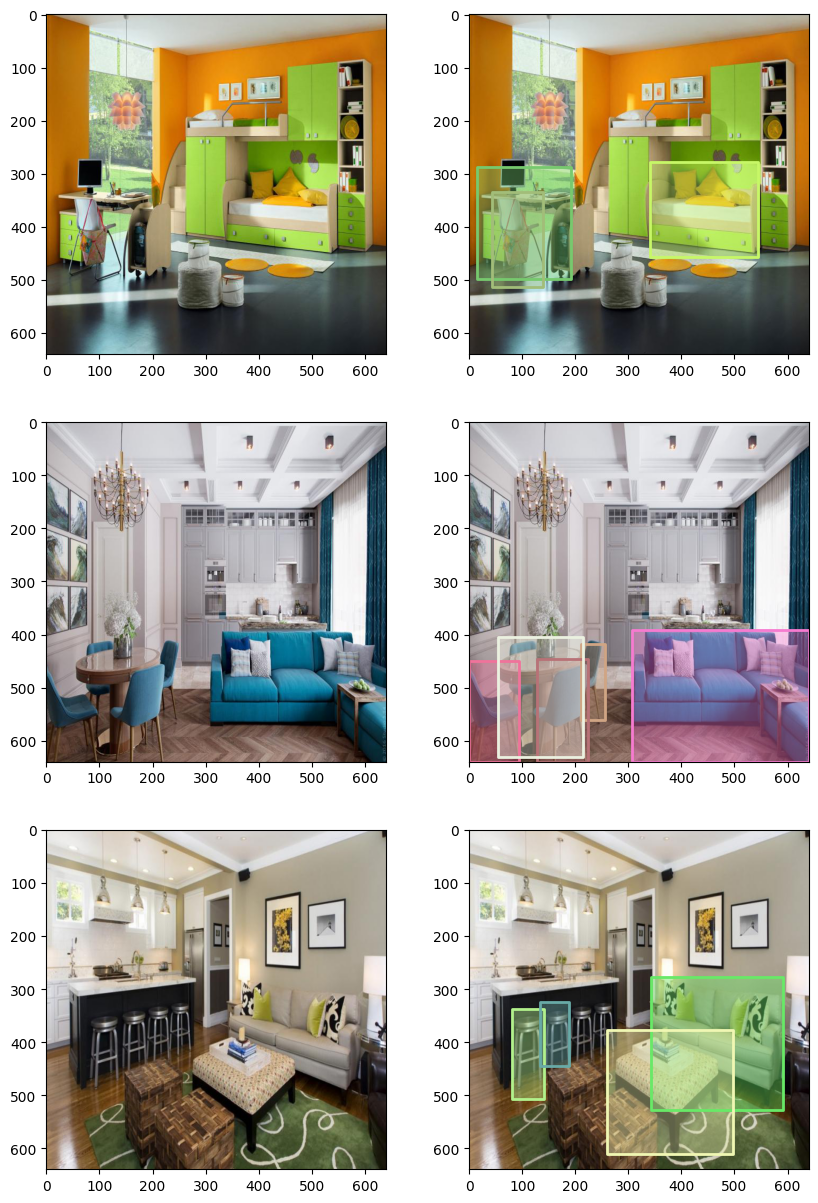

In [24]:
imgs = coco.loadImgs(imgIds[-3:])
_,axs = plt.subplots(len(imgs),2,figsize=(10,5 * len(imgs)))
for img, ax in zip(imgs, axs):
    I = io.imread(dataDir/img['file_name'])
    annIds = coco.getAnnIds(imgIds=[img['id']])
    anns = coco.loadAnns(annIds)
    ax[0].imshow(I)
    ax[1].imshow(I)
    plt.sca(ax[1])
    coco.showAnns(anns, draw_bbox=True)